In [1]:
import pandas as pd

# Load the new ECG file
df_ecg = pd.read_csv("ecg_data_20241219_085405.csv")

# Preview shape and columns only (no full data print)
print(df_ecg.shape)
print(df_ecg.columns)
df_ecg.head()  # show first 5 rows


(17523, 3)
Index(['Timestamp', 'ECG_CH1', 'ECG_CH2'], dtype='object')


,Timestamp,ECG_CH1,ECG_CH2
0,2024-12-19 08:54:10,210830,16347
1,2024-12-19 08:54:10,209806,16358
2,2024-12-19 08:54:10,208855,16350
3,2024-12-19 08:54:10,208966,16353
4,2024-12-19 08:54:10,209575,16340


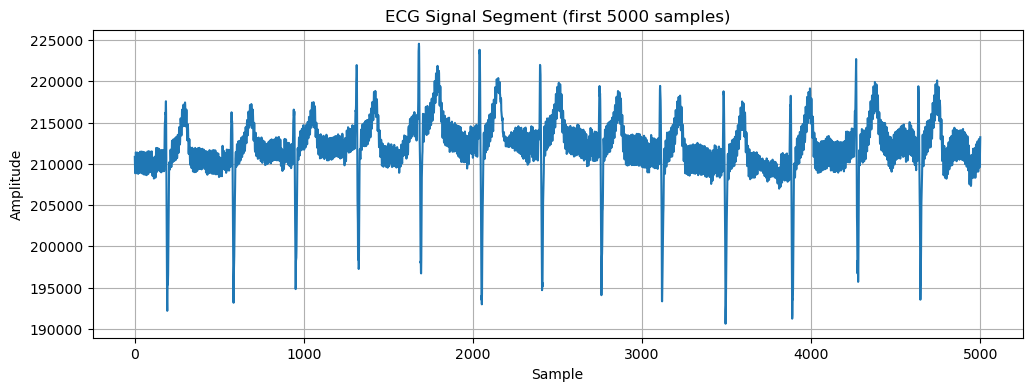

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df_ecg.iloc[:5000, 1])  # assuming ECG is in the second column
plt.title("ECG Signal Segment (first 5000 samples)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [3]:
print(df_ecg.columns)


Index(['Timestamp', 'ECG_CH1', 'ECG_CH2'], dtype='object')


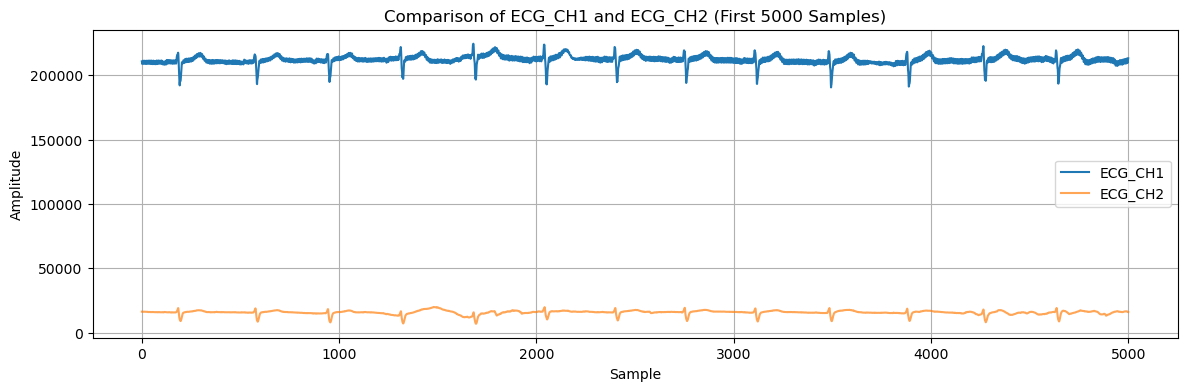

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(df_ecg['ECG_CH1'][:5000], label='ECG_CH1')
plt.plot(df_ecg['ECG_CH2'][:5000], label='ECG_CH2', alpha=0.7)
plt.legend()
plt.title("Comparison of ECG_CH1 and ECG_CH2 (First 5000 Samples)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [7]:
   !pip install neurokit2
   

   ---------------------------------------- 0.0/708.4 kB ? eta -:--:--
   ---------------------------------------- 708.4/708.4 kB 7.8 MB/s eta 0:00:00


In [8]:
import neurokit2 as nk
import matplotlib.pyplot as plt


In [9]:
# Use ECG_CH2 for analysis
ecg_signal = df_ecg['ECG_CH2']

# Define sampling rate (you must confirm this from your device — assume 256 for now)
sampling_rate = 256

# Clean ECG signal
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)


In [10]:
# Detect R-peaks
ecg_peaks, peak_info = nk.ecg_peaks(ecg_cleaned, sampling_rate=sampling_rate)


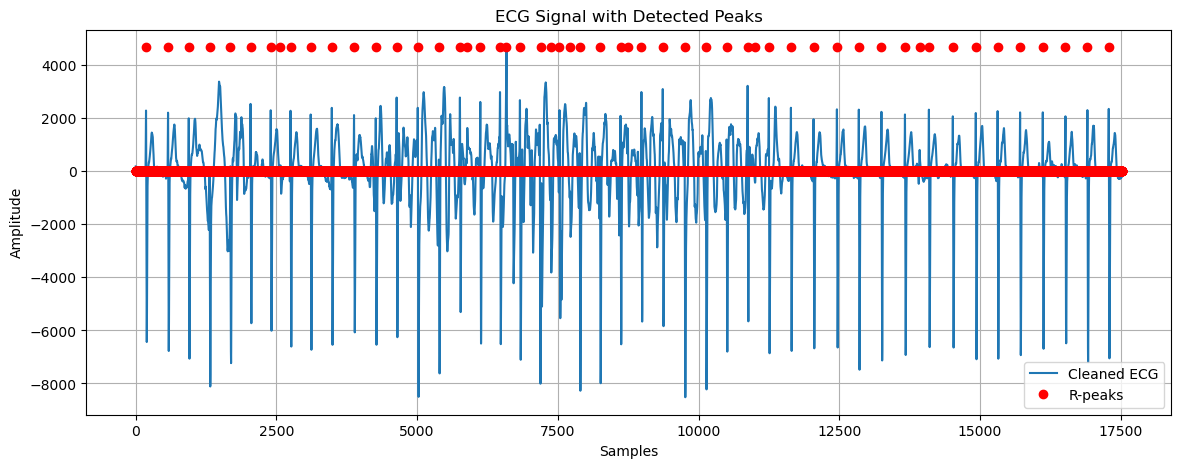

In [18]:
# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(signals["ECG_Clean"], label="Cleaned ECG")
plt.plot(signals["ECG_R_Peaks"] * max(signals["ECG_Clean"]), 'ro', label="R-peaks")  # mark R-peaks
plt.title("ECG Signal with Detected Peaks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Extract HRV metrics (time, frequency, nonlinear domains)
hrv_metrics = nk.hrv(info, sampling_rate=sampling_rate)

# Preview first few HRV features
hrv_metrics.head()



C:\Users\asada\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:536: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,1260.465802,381.191511,NaN,NaN,NaN,NaN,NaN,NaN,423.261056,427.38956,...,0.632523,5.345568,0.868432,0.722882,0.821229,0.821861,1.296177,1.880353,2.847928,1.08074
